In [1]:
from util import * 
config = './configs/demo.yaml'
config_info = read_yaml(path=config)

In [2]:
config_info

{'setting': 'demo',
 'root': '',
 'save_folder_name': 'demo_updated_new',
 'num_iters': 1,
 'alpha': 0.05,
 'strata_mod': '',
 'strata_metadata_mod': '',
 'params_mod': [[['obs_dict',
    {'num_obs': 2,
     'sizes': [1.0, 1.0],
     'confounder_concealment': [5, 0],
     'missing_bias': [False, False]}],
   ['response_surface',
    {'ctr': 'non_linear',
     'trt': 'linear',
     'model': 'LinearRegression',
     'hp': {}}]]]}

In [3]:
from simulation_mmr import *
results = run_simulation(params_mod='')
print(results)


Simulation Number 1
data generation parameters: {'num_continuous': 4, 'num_binary': 3, 'omega': -23, 'gamma_coefs': [0.1, 0.2, 0.5, 0.75, 1.0], 'gamma_probs': [0.2, 0.2, 0.2, 0.2, 0.2], 'grand_seed': 10, 'confounder_seed': 776, 'beta_seed': 4, 'noise_seed': 956, 'obs_dict': {'num_obs': 1, 'sizes': [5.0], 'confounder_concealment': [6], 'missing_bias': [False]}, 'reweighting': True, 'reweighting_factor': 0.2, 'response_surface': {'ctr': 'linear', 'trt': 'linear', 'model': 'LinearRegression', 'hp': {}}}
[Generating confounders for dataset 1.]
[Simulating outcomes for dataset 1.]
[Generating confounders for dataset 2.]
[Simulating outcomes for dataset 2.]

[trying hp (1.0,) for LogisticRegression]
[trying hp (0.1,) for LogisticRegression]
[trying hp (0.01,) for LogisticRegression]
[trying hp (0.001,) for LogisticRegression]
best hp: {'C': 0.1, 'input_dim': 29}

[trying hp (1.0,) for LogisticRegression]
[trying hp (0.1,) for LogisticRegression]
[trying hp (0.01,) for LogisticRegression]
[t

In [4]:
results[0].keys()

dict_keys(['iter', 'rct_obs0_pval', 'rct_obs0_f1', 'rct_obs0_f0', 'rct_obs0_Xseq', 'rct_obs0_Xmean', 'rct_obs0_cov_name'])

In [5]:
print(results[0]['rct_obs0_pval'])
# print(results[0]['rct_obs1_pval'])
# print(results[0]['rct_obs2_pval'])
# print(results[0]['rct_obs3_pval'])
# print(results[0]['rct_obs4_pval'])

0.31683168316831684


In [7]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

## alternate font/graph format
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rc('font', weight='heavy')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('axes', labelsize='x-large')

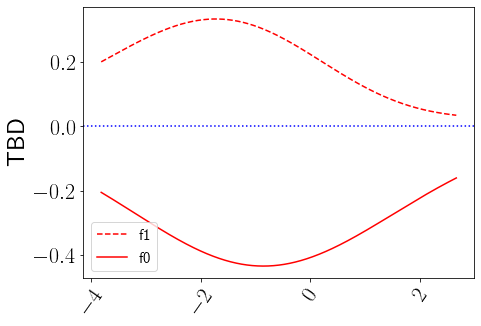

In [10]:
f1 = results[0]['rct_obs0_f1']
f0 = results[0]['rct_obs0_f0'] 
Xseq = results[0]['rct_obs0_Xseq']

fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.axhline(y=0, color='b', linestyle='dotted')

ax.plot(Xseq, f1, linestyle='--', color='red', label='f1')
ax.plot(Xseq, f0, linestyle='-', color='red', label='f0')
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim() 
ax.tick_params(axis='y', labelsize=22)
ax.tick_params(axis='x', labelsize=22)

ax.set_ylabel('TBD',fontsize=25)
legend_properties = {'weight':'bold'}
for item in ax.get_xticklabels():
    item.set_rotation(55)
ax.legend(loc='lower left',fontsize=15)
# fig.savefig('./plots/figure1_1sim_final_reweight_correction_second.pdf',bbox_inches='tight')